<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_Machine_Learning/blob/main/Image_Processing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Processing Basics** (part of the machine learning module)

for MArch Urban Design RC18, Bartlett School of Architecture, UCL

Coursse Tutor: William Huang (ucfnhua@ucl.ac.uk)

Last modified in February 2023

## 1. Import Packages

In [3]:
import numpy as np

import cv2 as cv
from google.colab.patches import cv2_imshow # cv.imshow()

from scipy import ndimage as ndi
from skimage.io import imread
from skimage.io import imshow
from skimage import data
from skimage.exposure import histogram
from skimage.color import rgb2grey
from skimage.filters import gaussian

import matplotlib.pyplot as plt

from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Read Images

<ipython-input-5-2520d06d8c36>:3: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  img2 = rgb2grey(imread(PATH))


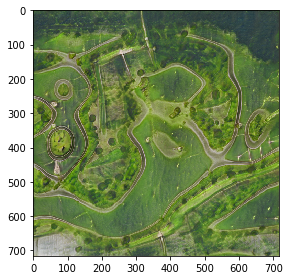

In [5]:
PATH = '/content/drive/My Drive/test.png' #@param{type:"string"}
img = imread(PATH)
img2 = rgb2grey(imread(PATH))
w, d = img2.shape
imshow(img)

#### Load Image Batch 

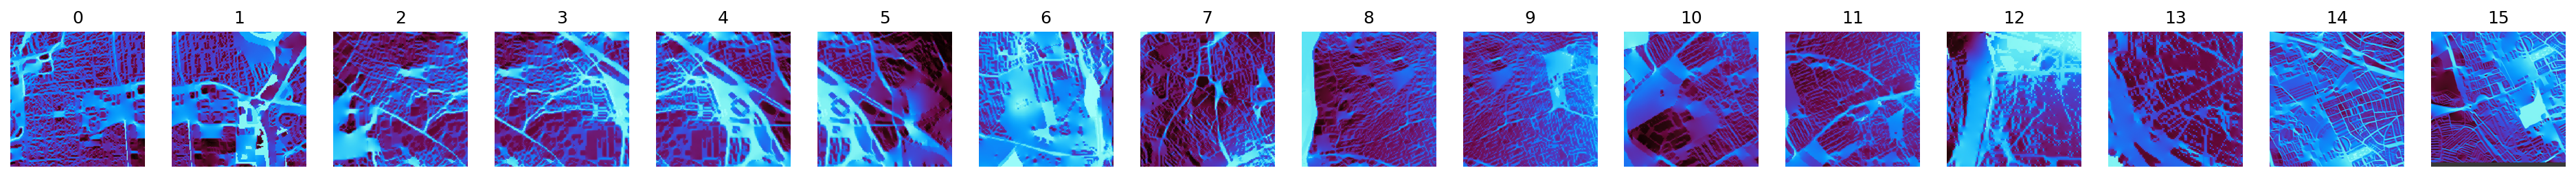

In [6]:
PATH = "/content/drive/My Drive/connectivity_w"

from glob import glob
images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*.jpg')]

num_of_data = 16

plt.figure(figsize = (32, 2), dpi=150)

for i in range(16):  
    plt.subplot(1, num_of_data, i+1)
    plt.title(i)
    plt.axis('off')  
    plt.imshow(images[i])

Note: OpenCV uses BGR image format as the default.

#### Quiz: Plot 16 images in a 4*4 image grid.

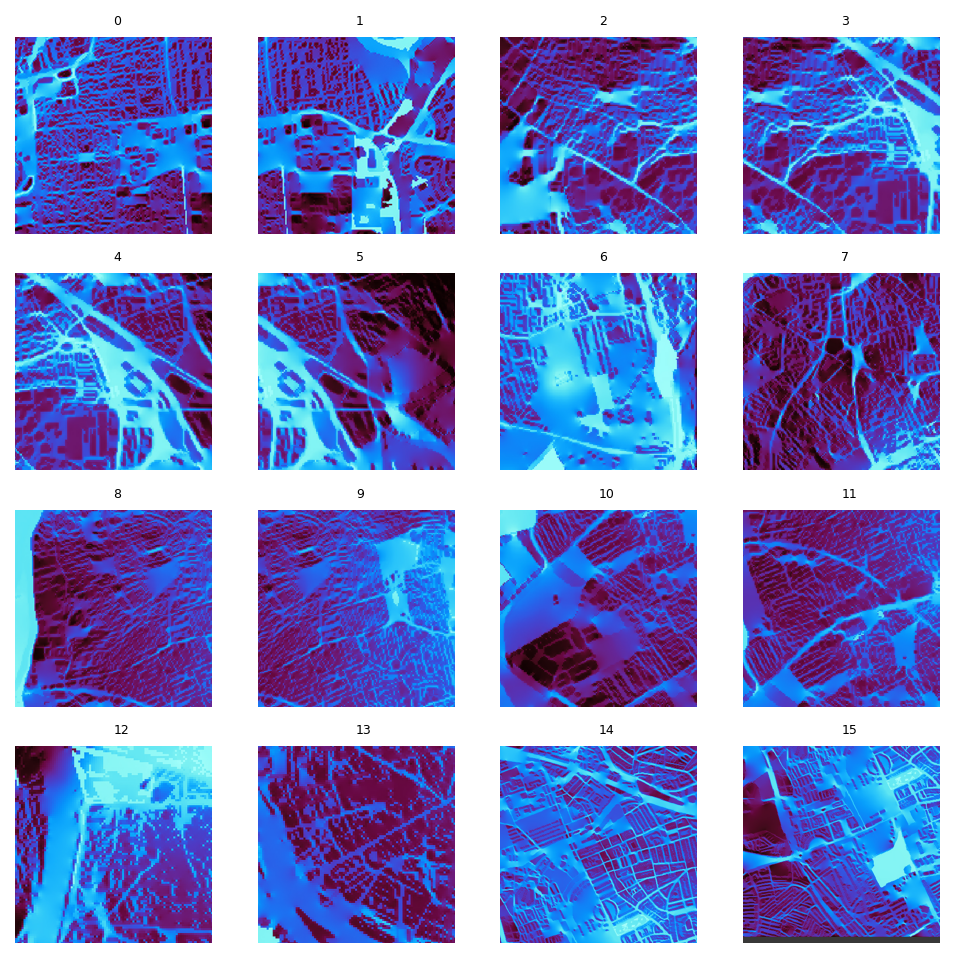

In [63]:
FSZ = 6 #@param{type:"slider", min:0, max:100, step:0.5} 

plt.figure(figsize = (8, 8), dpi=150)

for i in range(int(16**0.5)):  
    for j in range(int(16**0.5)):            
            index = (i+1) + (j*int(num_of_data**0.5)) # (column location) + (row location)
            plt.subplot(num_of_data**0.5, num_of_data**0.5, index)
            plt.title(index-1, fontsize=FSZ)
            plt.axis('off')  
            plt.imshow(images[index-1])  

## 3. Scale Images

Matrices for affine transformation operations:

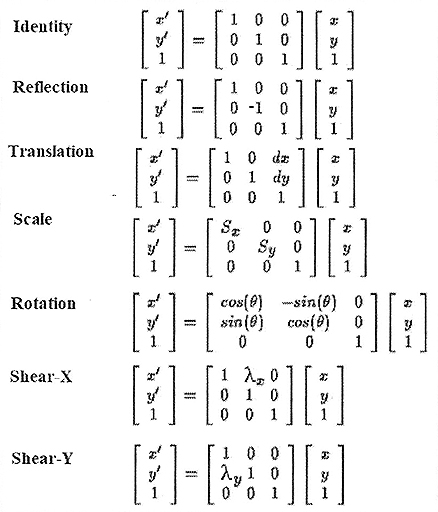

#### Method 1: based on numpy array

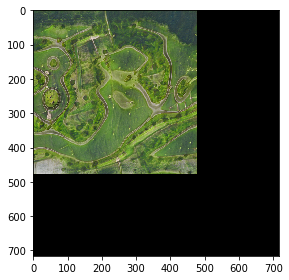

In [7]:
scale_x = 1.5 #@param{type:"slider", min:0, max:4, step:0.25} 
scale_y = 1.5 #@param{type:"slider", min:0, max:4, step:0.25} 
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img, img_scale)
# plt.axis('off')
imshow(img_scaled)

#### Method 2: based on opencv

`cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])`

In [8]:
print(img.shape) # check image shape

(716, 716, 3)


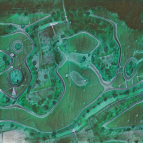

(143, 143, 3)


In [9]:
# percent of original size
scale_percent = 20 #@param{type:"slider", min:1, max:100, step:0.5} 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

im_resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)

cv2_imshow(im_resized)
print(im_resized.shape) # chack image shape

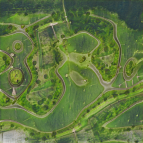

In [10]:
im_resized_rgb = cv.cvtColor(im_resized, cv.COLOR_BGR2RGB)
cv2_imshow(im_resized_rgb)

Compare `cv2_imshow()` with `plt.imshow()`

## 4. Subplots

`matplotlib.pyplot.subplot(nrows, ncols, index, **kwargs)`

`matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)`

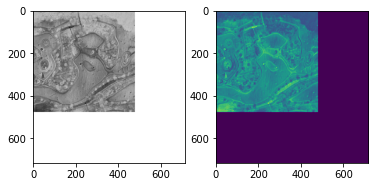

In [11]:
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img2, img_scale)

fig, (ax, ax2) = plt.subplots(1, 2) 
ax.imshow(img_scaled, cmap='binary')
ax2.imshow(img_scaled, cmap='viridis')

## 5. Crop Images

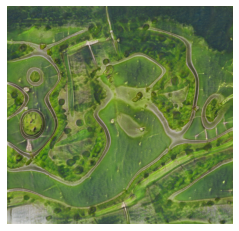

In [12]:
image = cv.imread("/content/drive/My Drive/test.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
width = 514 #@param {type:'slider', min:0, max:2048, step: 2}
height = 496 #@param {type:'slider', min:0, max:2048, step: 2}
image = cv.resize(image, (width, height))
axis = 'off' #@param ['on', 'off'] {type:'string'}
plt.axis(axis)
plt.imshow(image)

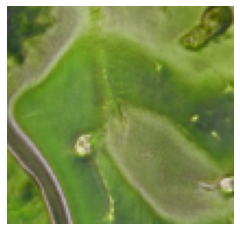

In [13]:
import tensorflow as tf

central_fraction = 0.2 #@param {type:'slider', min:0, max:1, step:0.1}
img_cropped = tf.image.central_crop(image, central_fraction)
axis = 'off' #@param ['on', 'off'] {type:'string'}
plt.axis(axis)
plt.imshow(img_cropped)

## 6. Rotate Images

`cv2.getRotationMatrix2D(centre, angle, scale)`

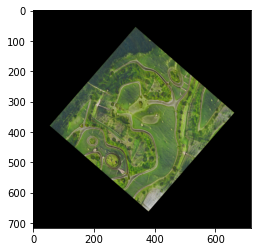

In [14]:
# Get image dimensions
rows, cols = img.shape[:2]

# Specify the angle of rotation
angle = 49 #@param {type:'slider', min:-179, max:179, step:1}

M = cv.getRotationMatrix2D((cols/2,rows/2), angle, scale=0.6) # Get the rotation matrix

image_roatated = cv.warpAffine(img, M, (cols, rows)) # Perform the rotation

plt.imshow(image_roatated)

In [15]:
# Save the rotated image
cv.imwrite("rotated_image.jpg", image_roatated)

True

## 7. Plot Histogram

`plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)`

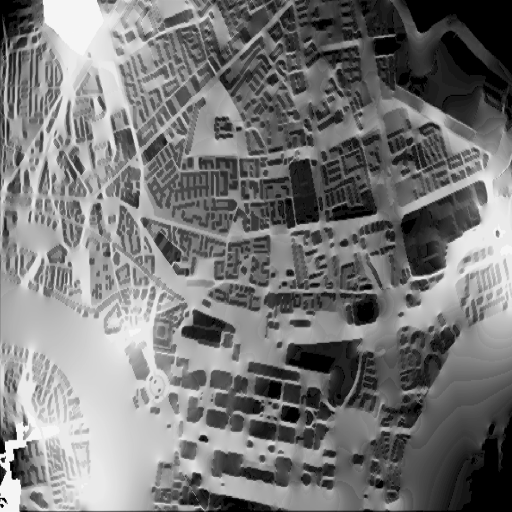

In [16]:
# Read image as grayscale image 
path = "/content/drive/My Drive/site_connectivity.png"

im = cv.imread(path,cv.IMREAD_GRAYSCALE)
im_resized = cv.resize(im, dsize=(512, 512))
cv2_imshow(im_resized)

[  0.      15.5625  31.125   46.6875  62.25    77.8125  93.375  108.9375
 124.5    140.0625 155.625  171.1875 186.75   202.3125 217.875  233.4375
 249.    ] <a list of 16 Patch objects>


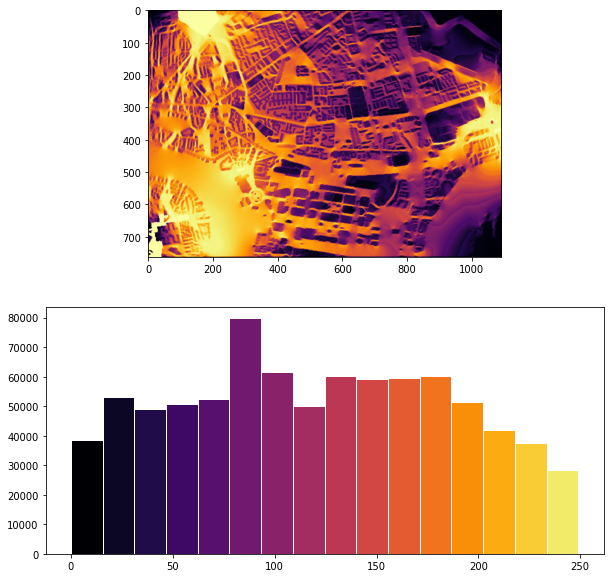

In [17]:
plt.figure(figsize=(10, 10)) # set figure size 

# top subplot 
plt.subplot(211) 
im2 = plt.imread(path)
plt.imshow(im2)

# bottom subplot 
plt.subplot(212)
num_of_bins = 16 #@param {type:'slider', min:0, max:512, step:1}

vals = im.flatten() # flatten a multi-dimensional numpy array into a one-dimensional arra

b, bins, patches = plt.hist(vals, num_of_bins, edgecolor='white') # plot histogram 
print(bins, patches)

"""
'b': This is a numpy array or a list of the values that define the bin edges of 
the histogram. The number of bins will be determined by the number of elements 
in this array minus one.

'bins': This is an optional parameter that sets the number of bins in the 
histogram. When b is not provided, this parameter is used to determine the 
number of bins.

'patches': This is an output parameter that returns a list of patch objects that 
represent the bars in the histogram. These patch objects can be further modified
 to change the appearance of the histogram.
"""

# set colour scheme
cm = plt.get_cmap('inferno') # set colour map

for i in range(len(patches)):
    color = cm(i / len(patches))  # sampling in the colour map 
    patches[i].set_facecolor(color) # assign colour sample

matplotlib colour maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

## 8. Edge Detection



### Sobel Edge Detection

Sobel_x = `cv2.Sobel(im, cv.CV_64F, 1, 0, ksize)`

Sobel_y = `cv2.Sobel(im, cv.CV_64F, 0, 1, ksize)`





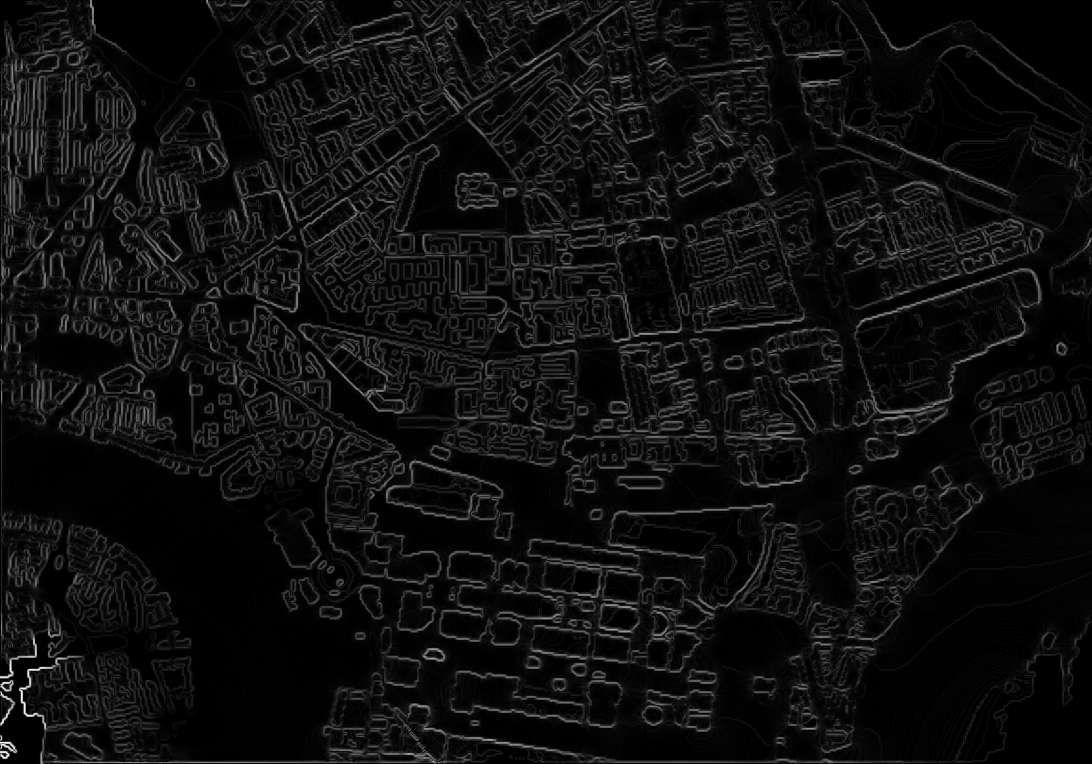

In [18]:
# Apply the Sobel filter
sobel_x = cv.Sobel(im, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(im, cv.CV_64F, 0, 1, ksize=3)

sobel_combined = np.sqrt(np.power(sobel_x, 2) + np.power(sobel_y, 2)) # combine the results to get the edges
sobel_combined = np.uint8(sobel_combined / np.max(sobel_combined) * 255) # normalise the result

cv2_imshow(sobel_combined) # display the result
#cv2_imshow(im)

### Canny Edge Detection

`cv.Canny(image, threshold1, threshold2)`

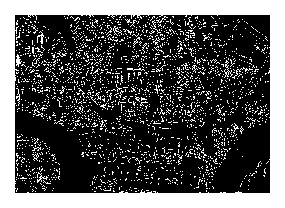

In [19]:
import cv2 as cv
threshold_1 = 72 #@param{type:"slider", min:0, max:255, step:1}
threshold_2 = 70 #@param{type:"slider", min:0, max:255, step:1}
fig_size = 2 #@param{type:"slider", min:0, max:20, step:1}
res = 150  #@param [75, 150, 300, 600, 1200] {type:"raw"}

edges = cv.Canny(im, threshold_1, threshold_2)

plt.figure(figsize=(fig_size, fig_size*2), dpi=res)
plt.axis('off')
imshow(edges) # plot the edge map using skimage

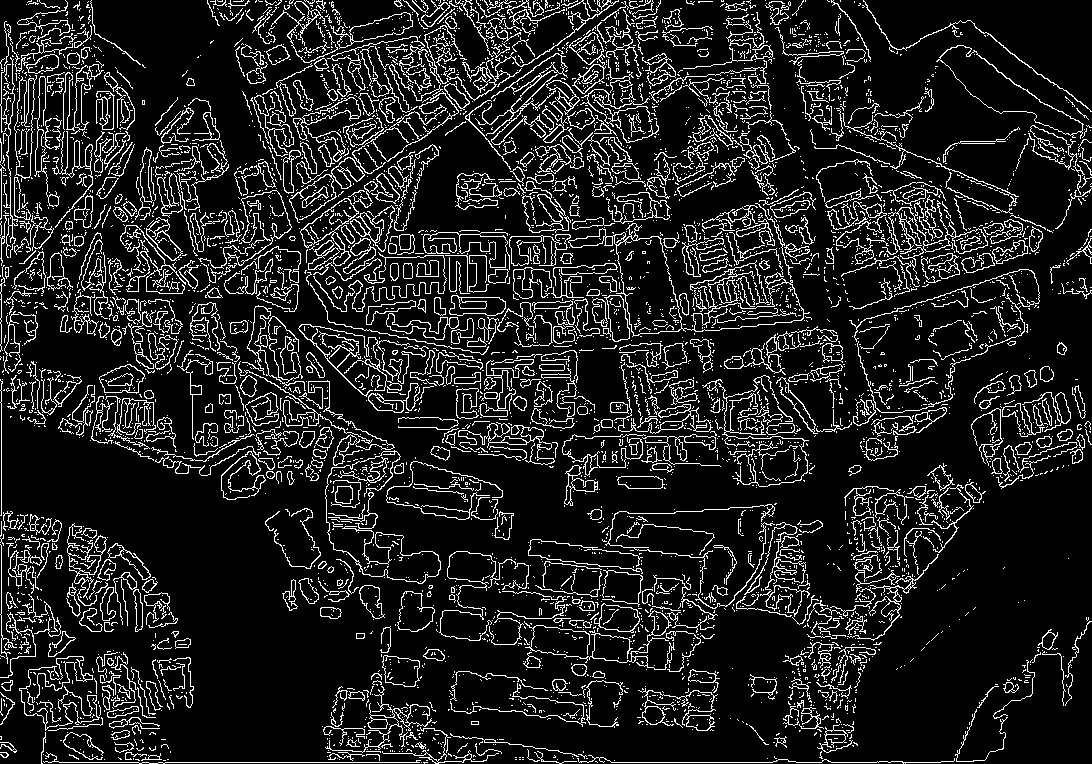

In [20]:
cv2_imshow(edges) # plot the edge map using opencv

### Plot Edge Gradient

In [21]:
gradient = [] # to save the canny images gradient
number_of_degrees = 8 #@param{type:"slider", min:0, max:32, step:1}

In [22]:
# define a method to create an n-step gradient of threshold to create the corresponding Canny edge maps
def Can_gradient(im, num_degrees): 
    step = 256//num_degrees
    for i in range(0, 256, step):     
        edges = cv.Canny(im, i, i) # create current Canny edge map
        gradient.append(edges) # save current Canny edge map to the list 'gradient'   

In [23]:
Can_gradient(im, number_of_degrees)
print(gradient)

[array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..

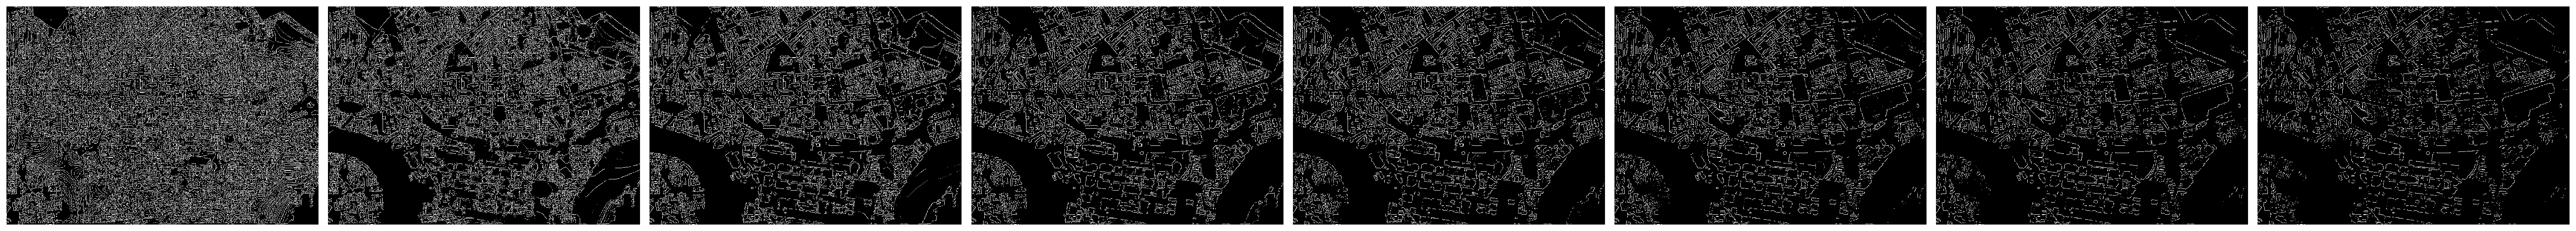

In [24]:
plt.figure(figsize=(40, 4), dpi=150) # set figures; this only run once and should be place outside the loop

for index in range(number_of_degrees):
    #plt.figure(figsize=(30, 3), dpi=150)
    plt.subplot(1, number_of_degrees, index+1)
    plt.axis('off')    
    imshow(gradient[index])

### Canny Processing on a Batch of Images

In [25]:
Can_imgs = []
img_id = []

In [26]:
def Can_series(im_list, order):

    threshold_1 = 255 #@param{type:"slider", min:0, max:255, step:1}
    threshold_2 = 255 #@param{type:"slider", min:0, max:255, step:1}
   
    edges = cv.Canny(im_list[order], threshold_1, threshold_2)
    Can_imgs.append(edges)
    id = str(order) + '.png'
    img_id.append(id)
    
    plt.subplot(1, len(im_list), order+1)
    plt.title(id)
    plt.axis('off')    
    imshow(edges)

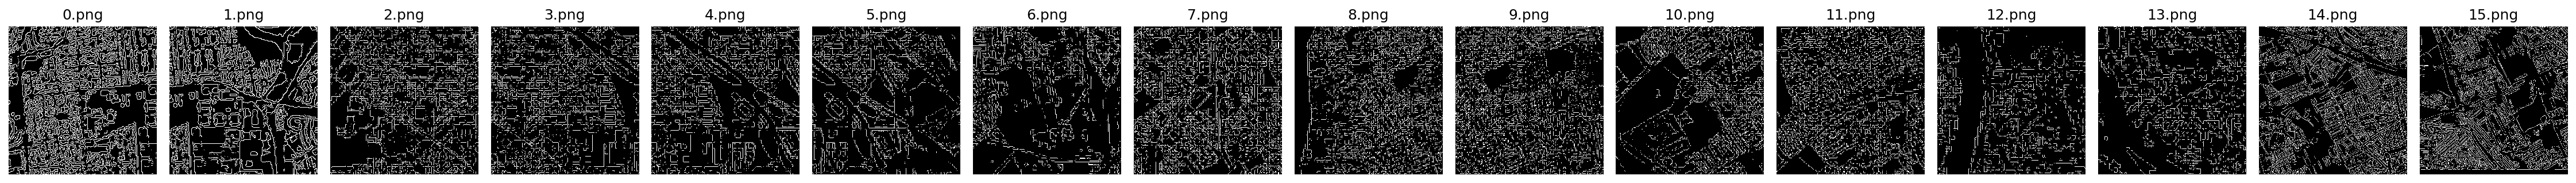

In [27]:
plt.figure(figsize=(30, 3), dpi=150)

for i in range(len(images)):      
    Can_series(images, i)

In [28]:
Can_imgs

[array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255,   0,   0],
        [255, 255,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[  0, 255,   0, ...,   0,   0,   0],
        [  0, 255, 255, ...,   0,   0,   0],
        [  0,   0, 255, ...,   0, 255,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0, ..., 255,   0,   0],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ...,   0,   0, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0, 255, 255],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [255, 255, 255, ..., 255, 255, 255],
        [  0,   

<Figure size 4500x4500 with 0 Axes>

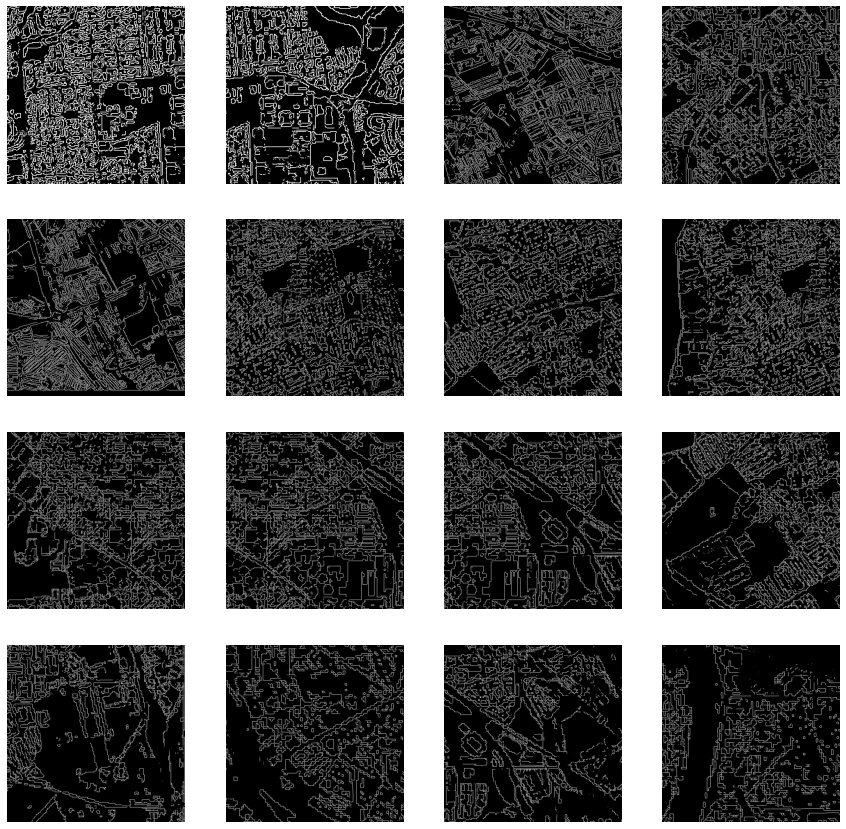

In [33]:
# Sort the images by average brightness
Can_imgs.sort(key=lambda x: np.mean(x), reverse = True)

# Plot the images in a 4x4 grid
plt.figure(figsize=(30, 30), dpi=150)
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i, ax in enumerate(axs.flat): # enumerate() in a for loop returns (index, value)
    ax.imshow(Can_imgs[i], cmap='gray')
    ax.axis('off')

# Display the grid
plt.show()

## 9. Coversion between Image, Array and Data Frame

### To Numpy Array

In [ ]:
import pandas as pd

In [ ]:
IMG = np.array(im_resized)
IMG

### From Numpy Array to List

In [ ]:
IMG_f = IMG.flatten()
IMG_f
# print((IMG_f).shape)

### To Pandas Data Frame

In [ ]:
df_IMG = pd.DataFrame(IMG_f)
df_IMG

However, this dimensionality does not fulfill our demands: We want an image as a row rather than a column.

### Flip Matrix

In [ ]:
IMG_f_r = IMG_f.reshape(1, -1)
IMG_f_r

In [ ]:
df_IMG_2 = pd.DataFrame(IMG_f_r)
df_IMG_2

In [ ]:
plt.figure(figsize=(8, 0.25), dpi=150)

pos_x = []
for i in range(0, len(IMG_f)):
  pos_x.append(i)

pos_y = [0]* len(IMG_f)

plt.scatter(pos_x, pos_y, marker='|', c=IMG_f_r) 
plt.pcolormesh(IMG_f_r, cmap='plasma')
plt.axis('off')

SAVING_PATH = "/content/drive/My Drive" #@param{type:"string"}
plt.savefig(SAVING_PATH + '/strip.png', dpi=150) # must to be placed before plt.show()

plt.show()

In [ ]:
RE = np.array_split(IMG_f, 512) # split the list into 512 sub-lists
print(RE)

In [ ]:
import seaborn as sns
plt.figure(figsize=(4, 4), dpi=150)
plt.axis('off')
sns.heatmap(RE, cmap='inferno', cbar=False, annot=False)